In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

from agents import SatisfiaAgent
from games import JOBST_GAME
from monte_carlo import combined_strategies
from network.closeness_centrality import NetworkByCentrality

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
N_AGENTS = 50
EDGES_PER_NODE = 2
BASE_BARABASI = nx.barabasi_albert_graph(N_AGENTS, EDGES_PER_NODE)

In [4]:
my_graph = NetworkByCentrality(
                                JOBST_GAME,
                                combined_strategies,
                                0.4,
                                100,
                                BASE_BARABASI,
                                50,
                                0
)

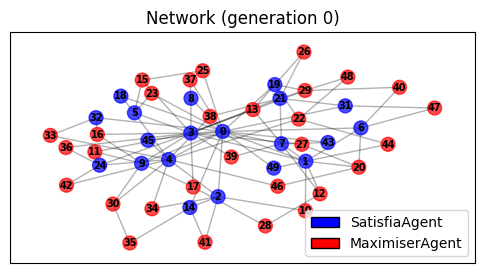

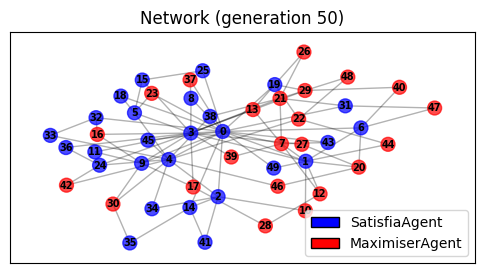

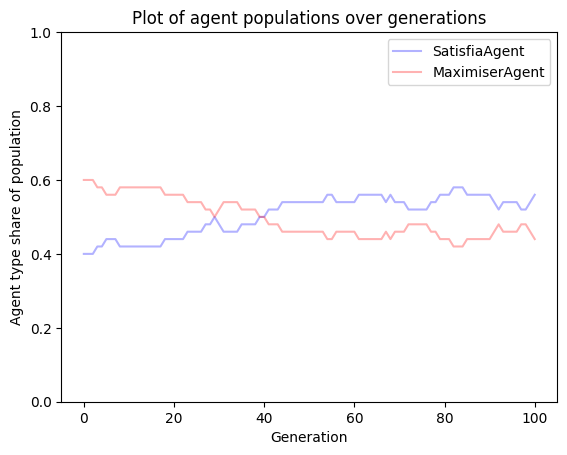

In [5]:
my_graph.iterate_generations(1, 1, plot=True)

In [10]:
# Constant parameters for experimenting over centrality shifts
N_AGENTS = 30
EDGES_PER_NODE = 2
BASE_BARABASI = nx.barabasi_albert_graph(N_AGENTS, EDGES_PER_NODE)
SATISFIA_SHARE=0.5
# Defining range of shifts
centrality_shifts = np.arange(stop=round(N_AGENTS*(1-SATISFIA_SHARE)), step=1)
print(centrality_shifts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


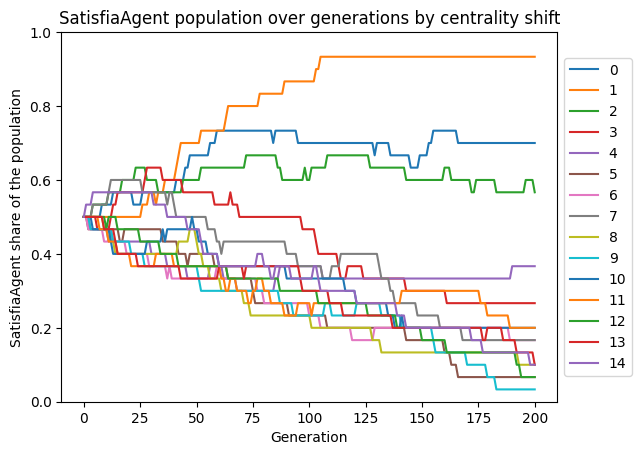

In [12]:
def experiment_over_shifts(range_of_shifts: list[int], agent_to_plot):

    for shift in range_of_shifts:

        my_graph = NetworkByCentrality(
                                JOBST_GAME,
                                combined_strategies,
                                SATISFIA_SHARE,
                                200,
                                BASE_BARABASI,
                                100,
                                shift)
        
        agent_counts = my_graph.iterate_generations(1, 0.5)
        satisfia_counts = agent_counts[agent_to_plot]
        plt.plot(np.array(satisfia_counts) / my_graph.n_agents, label=shift)

    plt.title(f'{agent_to_plot.__name__} population over generations by centrality shift')
    plt.xlabel('Generation')
    plt.ylabel(f'{agent_to_plot.__name__} share of the population')
    plt.ylim([0,1])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()


experiment_over_shifts(centrality_shifts, agent_to_plot=SatisfiaAgent)